<a href="https://colab.research.google.com/github/python-elidas/Tutoriales/blob/main/First_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [2]:
#Generamos las variables

n = 500 # numero de registros en el data set
p = 2   # numero de caracteristicas por registro



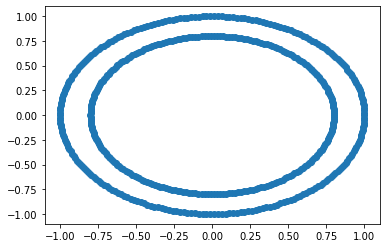

In [3]:
# Creamos el DataSet
X, y = make_circles(n_samples=n)

y = y[:, np.newaxis]

plt.scatter(X[:, 0], X[:, 1])
plt.show()

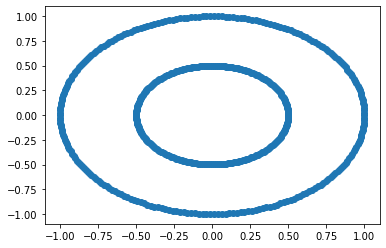

In [4]:
# añadiendo factor de error
X, y = make_circles(n_samples=n, factor=0.5)

y = y[:, np.newaxis]

plt.scatter(X[:, 0], X[:, 1])
plt.show()

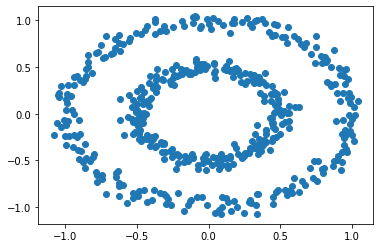

In [5]:
# Añadiendo Ruido
X, y = make_circles(n_samples=n, factor=0.5, noise=0.05)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [6]:
# La variable y corresponde a un vector binario que establece que punto perntenbece a que circulo:
y

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

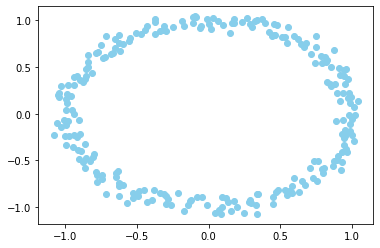

In [7]:
# haceindo un par de modificaciones podemos hacer que el gráfico sea mas vistoso.

y = y[:, np.newaxis] # convertimos y en una matriz comuna

plt.scatter(X[y[:, 0]==0, 0], X[y[:, 0]==0, 1], c='skyblue')
plt.show()

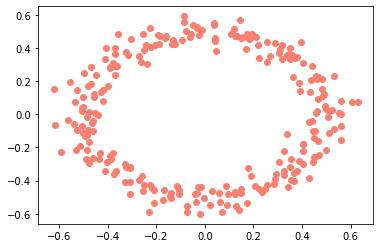

In [8]:
plt.scatter(X[y[:, 0]==1, 0], X[y[:, 0]==1, 1], c='salmon')
plt.show()

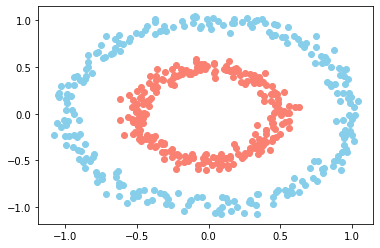

In [9]:
#Todo Junto:
plt.scatter(X[y[:, 0]==0, 0], X[y[:, 0]==0, 1], c='skyblue')
plt.scatter(X[y[:, 0]==1, 0], X[y[:, 0]==1, 1], c='salmon')
plt.show()

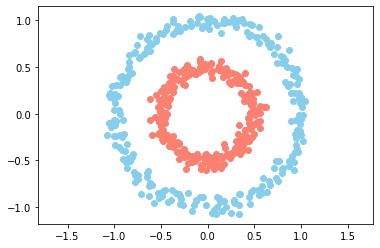

In [10]:
# Y por Ultimo:
plt.scatter(X[y[:, 0]==0, 0], X[y[:, 0]==0, 1], c='skyblue')
plt.scatter(X[y[:, 0]==1, 0], X[y[:, 0]==1, 1], c='salmon')
plt.axis('equal')
plt.show()

In [11]:
# __EMPEZAMOS CON LA RED NEURONAL__

In [12]:
#Clase de la capapde la red

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f # funcion de activación de la capa

    self.b = np.random.rand(1, n_neur) * 2 - 1 #Parametro de Bias normalizado
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

In [13]:
# Funcion de Activación

sigm = (lambda x: 1 / ( 1 + np.e ** (-x)), # funcion sigmoide
        lambda x: x * (1 - x)) # derivada de la funcion sigmoide

relu = lambda x: np.maximum(0, x) # definicion de la funcion RELU

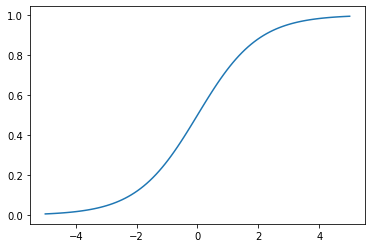

In [14]:
#Creamos los datos para la función
_x = np.linspace(-5, 5, 100)

#Visualizamos la funcion sigmoide:
plt.plot(_x, sigm[0](_x))
plt.show()

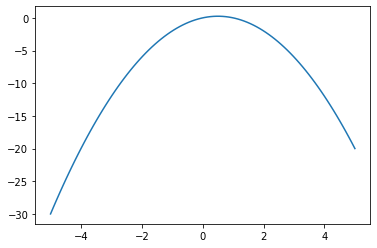

In [15]:
#Visualizamos la derivada de la funcion sigmoide:
plt.plot(_x, sigm[1](_x))
plt.show()

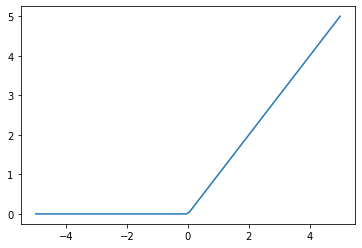

In [16]:
# VIsualizamos la funcion relu:
plt.plot(_x, relu(_x))
plt.show()

In [17]:
l0 = neural_layer(p, 4, sigm) # capa de neuronas 0 con p conexiones de entrada, 4 neuronas y funcion de activacion sigmoide
l1 = neural_layer(4, 8, sigm) # capa de neuronas 1 con 4 conexiones de entrada, 8 neuronas y funcion de activacion sigmoide
# ...
#definiendo cada capa de forma manual te puedes volver loco

In [18]:
#en vez de eso, crearemos una funcion que cree las capas de froma automatica.

def create_neural_net(topology, act_f):

  neural_network = list()

  for n, layer in enumerate(topology[:-1]):
    
    neural_network.append(neural_layer(topology[n], topology[n+1], act_f))
  
  return neural_network

#CON ESTO HEMOS CREADO NUESTRA RED NEURONAL 

In [19]:
#COMENZAMOS A ENTRAR LA RED NEURONAL

topology = [p, 4, 8, 1] #Numero de neuronas por capa elegido de froma arbitraria

neural_net = create_neural_net(topology, sigm)

f_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), # FUNCION DE ERROR CUADRATICO MEDIO
          lambda Yp, Yr: 2 * (Yp - Yr)) # Derivada de la funcion de error cuadratico medio            

def train(neural_net, X, y, f_cost, lr=0.5, train=True):

  out = [(None, X)]

  # Forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b # suma ponderada
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  if train:

    # Backward pass 
    delta = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        #calcular delta ultima capa
        delta.insert(0, f_cost[1](a, y) * neural_net[l].act_f[1](a))
      else:
        #calcular delta capa previa
        delta.insert(0, delta[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W
    
      #Gradient Descent
      neural_net[l].b -= np.mean(delta[0], axis=0, keepdims=True) * lr
      neural_net[l].W -= out[l][1].T @ delta[0] * lr

  return out[-1][1]


train(neural_net, X, y, f_cost, 0.5)
print('')

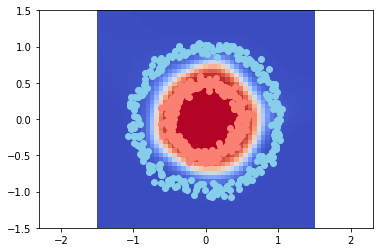

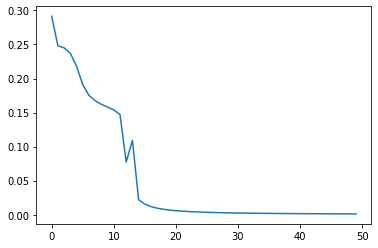

In [23]:
import time
from IPython.display import clear_output

neural_n = create_neural_net(topology, sigm)
loss = []

for i in range(2500):

  #Entrenamos la red neuronal
  pY = train(neural_n, X, y, f_cost, lr = 0.01)

  if i % 50 == 0:
    #print(pY)

    loss.append(f_cost[0](pY, y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, f_cost, train = False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(X[y[:, 0]==0, 0], X[y[:, 0]==0, 1], c='skyblue')
    plt.scatter(X[y[:, 0]==1, 0], X[y[:, 0]==1, 1], c='salmon') 

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.2)